In [2]:
import json
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import exists

In [4]:
data_dir = "../datasets/"

In [3]:
sp_list = []

#grab a list of stocks
with open(data_dir + "s&p_500.txt", "r") as sp500:
  for line in sp500:
    stripped_line = line.strip()
    sp_list.append(stripped_line)

In [5]:
with open(data_dir + 'directed_spearman_coefficients.csv', 'w') as csv_file:
    csv_file.write('stock1' + ',' + 'stock2' + ',' + 'spearman' + ',' + 'pval' + '\n')
    for stock1 in sp_list:
        for stock2 in sp_list:
            if exists(data_dir + 'aligned_time_series/' + stock1 + 'aligned_data.txt') and exists(data_dir + 'aligned_time_series/' + stock2 + 'aligned_data.txt'):
                stock1_vector = []
                stock2_vector = []
                with  open(data_dir + 'aligned_time_series/' + stock1 + 'aligned_data.txt') as json_file:
                    data = json.load(json_file)
                    for key in data[stock1].keys():
                        stock1_vector.append(data[stock1][key])
                with  open(data_dir + 'aligned_time_series/' + stock2 + 'aligned_data.txt') as json_file:
                    data = json.load(json_file)
                    for key in data[stock2].keys():
                        stock2_vector.append(data[stock2][key])
                print(stock1)
                #spearman ranges from [-1, 1], so -2 is set to find max
                max_rho = -2
                paired_pval = 0
                spearman_list = []
                for i in range(11):
                    rho, pval = spearmanr(stock1_vector[0:len(stock1_vector) - 10], stock2_vector[i: len(stock2_vector) - 10 + i])
                    spearman_list.append((rho, pval))
                    if abs(rho) > max_rho:
                        max_rho = rho
                        paired_pval = pval
                i = 0
                max_index = 0
                for rho, pval in spearman_list:
                    if rho == max_rho:
                        max_index = i
                    i += 1
                csv_file.write(str(stock1) + ',' + str(stock2) + ',' + str(max_rho) + ',' + str(paired_pval) + '\n')

A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A


0.4103899512192156


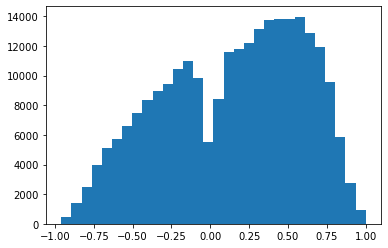

In [6]:
#look at the distibution of coefficients
df = pd.read_csv(data_dir + 'directed_spearman_coefficients.csv' )
plt.figure()
plt.hist(df['spearman'],bins=30)
print(np.mean(abs(df['spearman'])))
plt.savefig('../figures/directed_coefficient_distribution.png')